# Tugas Besar IF2220 Probabilitas dan Statistika

## Penarikan Kesimpulan dan Pengujian Hipotesis
- 13520006 - Vionie Novencia Thanggestyo
- 13520069 - Kent Liusudarso

### Enam Langkah Testing

1. Tentukan Hipotesis nol ${(H_0: θ = θ_0)}$, dimana ${θ}$ bisa berupa ${μ}$, ${σ^2}$, ${p}$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari ${θ > θ_0}$, ${θ < θ_0}$, atau ${θ ≠ θ_0}$.
3. Tentukan tingkat signifikan ${α}$.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung _p-value_ sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK ${H_0}$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK ${H_0}$ jika _p-value_ lebih kecil dibanding tingkat signifikansi ${α}$ yang diinginkan.


### Import Modules & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

coloumn_names = ['id', 'pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'OrganicCarbon', 'Trihalomethanes', 'Turbidity', 'Potability']
df = pd.read_csv('water_potability.csv', names=coloumn_names)
df

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


### Soal 1
Menulis deskripsi statistika (*Descriptive Statistics*) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [2]:
df1 = df.describe(include=[np.number])
df1.loc['variansi'] = df.var()
df1.loc['range'] = df.max() - df.min()
df1.loc['IQR'] = df.quantile(0.75) - df.quantile(0.25)
df1.loc['skewness'] = df.skew()
df1.loc['kurtosis'] = df.kurt()
modus = []
for coloumn in df1:
    if (df[coloumn].mode().count() == len(df)):
        modus.append('None')
    else:
        modus.append(df[coloumn].mode()[0])
df1.loc['modus'] = modus
df1

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
count,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.000000
mean,1005.5,7.087193,195.969209,21904.673439,7.134322,333.211376,426.476708,14.35794,66.400717,3.969497,0.402985
std,580.38134,1.572803,32.643166,8625.397911,1.585214,41.211111,80.701872,3.32577,16.081109,0.780471,0.490620
min,1.0,0.227499,73.492234,320.942611,1.390871,129.0,201.619737,2.2,8.577013,1.45,0.000000
25%,503.25,6.090785,176.740657,15614.412962,6.138326,307.626986,366.619219,12.12253,55.949993,3.442882,0.000000
50%,1005.5,7.02949,197.203525,20926.882155,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
75%,1507.75,8.053006,216.447589,27170.534649,8.109933,359.268147,482.209772,16.683562,77.294613,4.514663,1.000000
max,2010.0,14.0,317.338124,56488.672413,13.127,481.030642,753.34262,27.006707,124.0,6.494749,1.000000
variansi,336842.5,2.473709,1065.576277,74397489.126371,2.512904,1698.355672,6512.792113,11.060746,258.602066,0.609135,0.240708
range,2009.0,13.772501,243.84589,56167.729801,11.736129,352.030642,551.722883,24.806707,115.422987,5.044749,1.000000


### Soal 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

#### pH
histogram pH di bawah ini menunjukkan data bersifat skew normal dan lepto kurtik. Data juga memiliki pencilan atas dan pencilan bawah seperti yang ditunjukkan pada boxplot

<AxesSubplot:xlabel='pH', ylabel='Count'>

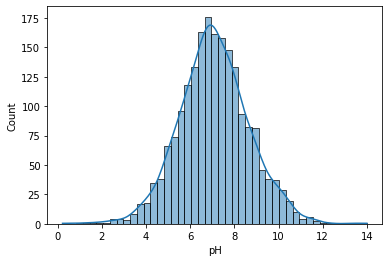

In [3]:
sns.histplot(df["pH"], kde=True)

<AxesSubplot:>

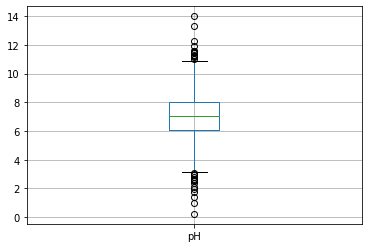

In [4]:
df.boxplot("pH")

#### Hardness
histogram Hardness di bawah ini menunjukkan data bersifat skew normal dan lepto kurtik. Data juga memiliki pencilan atas dan pencilan bawah seperti yang ditunjukkan pada boxplot

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

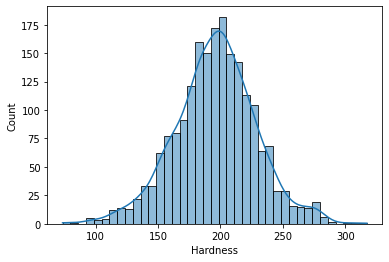

In [5]:
sns.histplot(df["Hardness"], kde=True)

<AxesSubplot:>

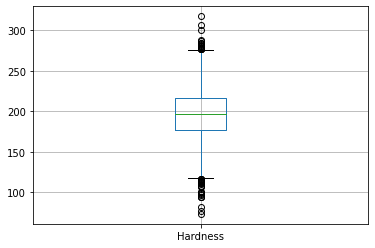

In [6]:
df.boxplot("Hardness")

#### Solids
histogram Solids di bawah ini menunjukkan data bersifat skew positif dan meso kurtik. Data juga memiliki pencilan atas seperti yang ditunjukkan pada boxplot

<AxesSubplot:xlabel='Solids', ylabel='Count'>

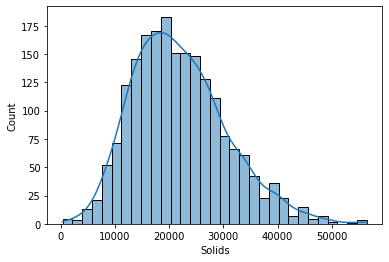

In [7]:
sns.histplot(df["Solids"], kde=True)

<AxesSubplot:>

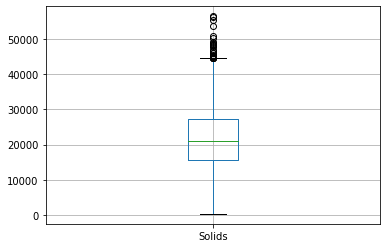

In [8]:
df.boxplot("Solids")

#### Chloramines
histogram Chloramines di bawah ini menunjukkan data bersifat skew normal dan lepto kurtik. Data juga memiliki pencilan atas dan pencialn bawah seperti yang ditunjukkan pada boxplot

<AxesSubplot:xlabel='Chloramines', ylabel='Count'>

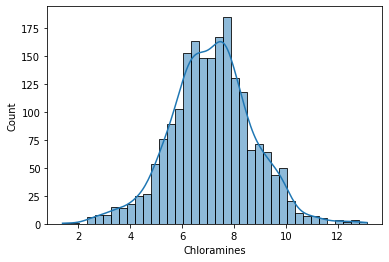

In [9]:
sns.histplot(df["Chloramines"], kde=True)

<AxesSubplot:>

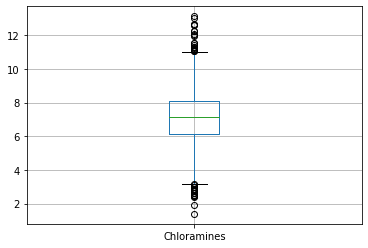

In [10]:
df.boxplot("Chloramines")

#### Sulfate
histogram Sulfate di bawah ini menunjukkan data bersifat skew noraml dan lepto kurtik. Data juga memiliki pencilan atas dan pencilan bawah seperti yang ditunjukkan pada boxplot

<AxesSubplot:xlabel='Sulfate', ylabel='Count'>

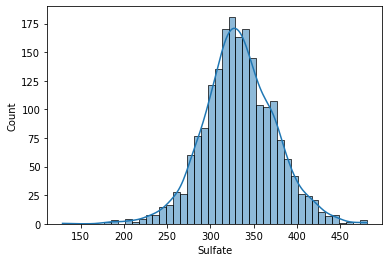

In [11]:
sns.histplot(df["Sulfate"], kde=True)

<AxesSubplot:>

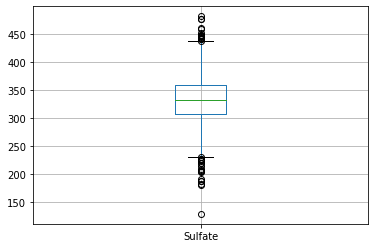

In [12]:
df.boxplot("Sulfate")

#### Conductivity
histogram Conductivity di bawah ini menunjukkan data bersifat skew positif dan meso kurtik. Data juga memiliki pencilan atas  seperti yang ditunjukkan pada boxplot

<AxesSubplot:xlabel='Conductivity', ylabel='Count'>

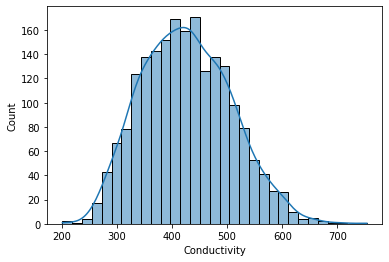

In [13]:
sns.histplot(df["Conductivity"], kde=True)

<AxesSubplot:>

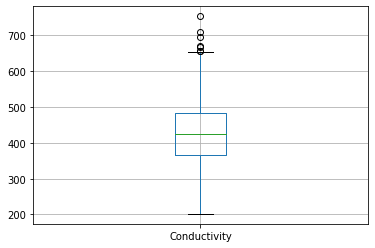

In [14]:
df.boxplot("Conductivity")

#### OrganicCarbon
histogram OrganicCarbon di bawah ini menunjukkan data bersifat skew positif dan plati kurtik. Data juga memiliki pencilan atas  seperti yang ditunjukkan pada boxplot

<AxesSubplot:xlabel='OrganicCarbon', ylabel='Count'>

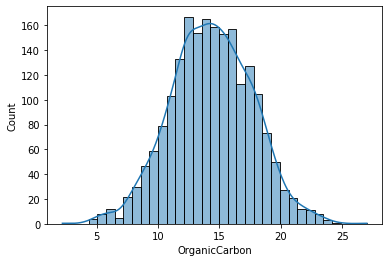

In [15]:
sns.histplot(df["OrganicCarbon"], kde=True)

<AxesSubplot:>

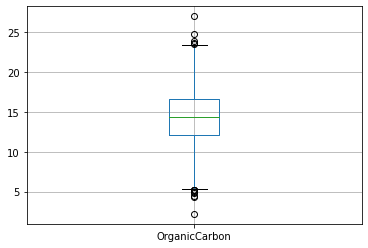

In [16]:
df.boxplot("OrganicCarbon")

#### Trihalomethanes
histogram Trihalomethanes di bawah ini menunjukkan data bersifat skew negatif dan meso kurtik. Data juga memiliki pencilan atas  seperti yang ditunjukkan pada boxplot

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Count'>

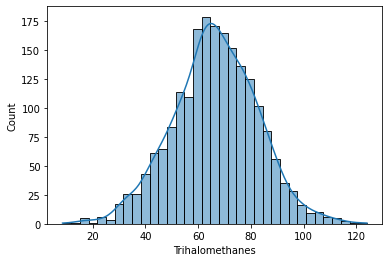

In [17]:
sns.histplot(df["Trihalomethanes"], kde=True)

<AxesSubplot:>

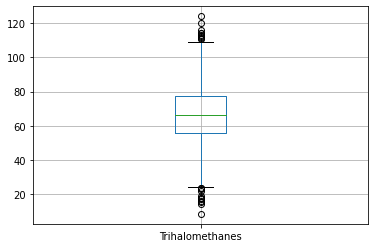

In [18]:
df.boxplot("Trihalomethanes")

#### Turbidity
histogram Turbidity di bawah ini menunjukkan data bersifat skew normal dan meso kurtik. Data juga memiliki pencilan atas  seperti yang ditunjukkan pada boxplot

<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

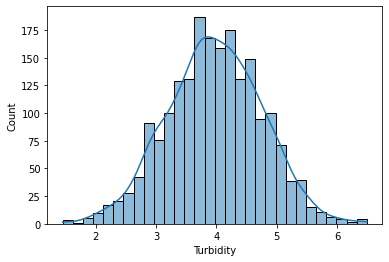

In [19]:
sns.histplot(df["Turbidity"], kde=True)

<AxesSubplot:>

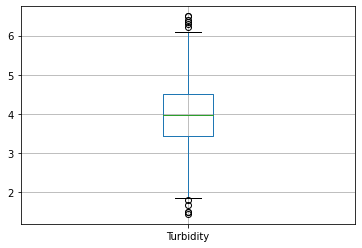

In [20]:
df.boxplot("Turbidity")

### Soal 3
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

#### D’Agostino’s K-squared

D’Agostino’s K-squared test menentukan apakah sebuah kolom berdistribusi normal atau tidak menurut skewness dan kurtosisnya. Jika hasil tes merupakan distribusi normal, maka pada histogram akan terlihat bell curve.

#### pH

<AxesSubplot:xlabel='pH', ylabel='Count'>

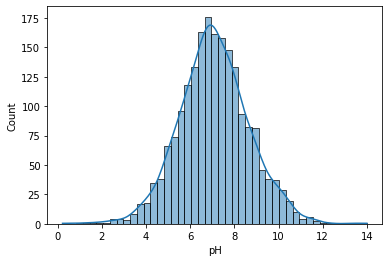

In [21]:
sns.histplot(df["pH"], kde=True)

In [22]:
stat, p = stats.normaltest(df["pH"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')


stat=21.076, p=0.000
Tidak Berdistribusi Normal


#### Hardness

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

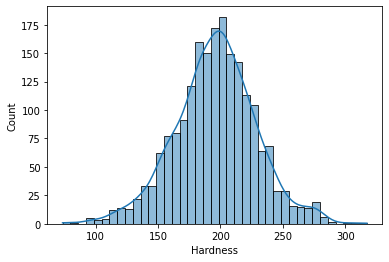

In [23]:
sns.histplot(df["Hardness"], kde=True)

In [24]:
stat, p = stats.normaltest(df["pH"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=21.076, p=0.000
Tidak Berdistribusi Normal


#### Solids

<AxesSubplot:xlabel='Solids', ylabel='Count'>

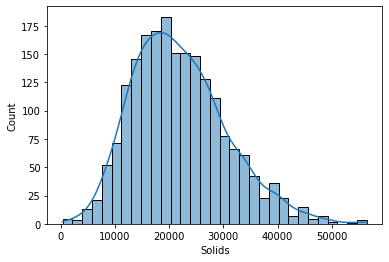

In [25]:
sns.histplot(df["Solids"], kde=True)

In [26]:
stat, p = stats.normaltest(df["Solids"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=109.060, p=0.000
Tidak Berdistribusi Normal


#### Chloramines

<AxesSubplot:xlabel='Chloramines', ylabel='Count'>

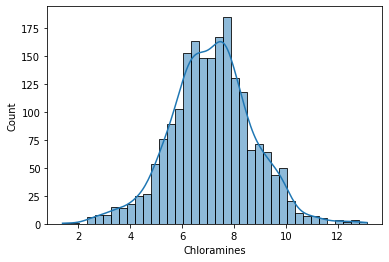

In [27]:
sns.histplot(df["Chloramines"], kde=True)

In [28]:
stat, p = stats.normaltest(df["Chloramines"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=16.584, p=0.000
Tidak Berdistribusi Normal


#### Sulfate

<AxesSubplot:xlabel='Sulfate', ylabel='Count'>

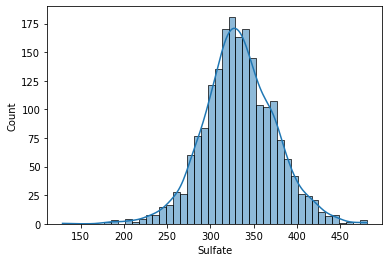

In [29]:
sns.histplot(df["Sulfate"], kde=True)

In [30]:
stat, p = stats.normaltest(df["Sulfate"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=29.261, p=0.000
Tidak Berdistribusi Normal


#### Conductivity

<AxesSubplot:xlabel='Conductivity', ylabel='Count'>

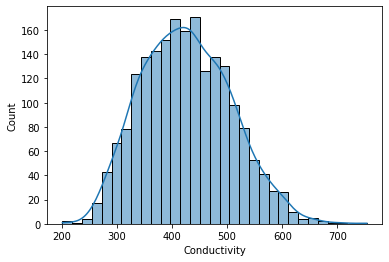

In [31]:
sns.histplot(df["Conductivity"], kde=True)

In [32]:
stat, p = stats.normaltest(df["Conductivity"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=29.277, p=0.000
Tidak Berdistribusi Normal


#### OrganicCarbon

<AxesSubplot:xlabel='OrganicCarbon', ylabel='Count'>

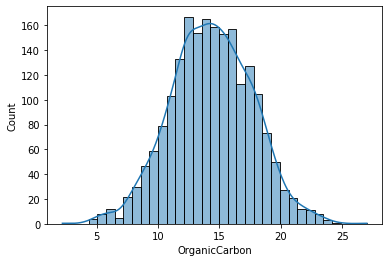

In [33]:
sns.histplot(df["OrganicCarbon"], kde=True)

In [34]:
stat, p = stats.normaltest(df["OrganicCarbon"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=0.250, p=0.883
Berdistribusi Normal


#### Trihalomethanes

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Count'>

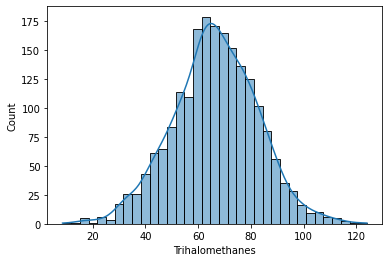

In [35]:
sns.histplot(df["Trihalomethanes"], kde=True)

In [36]:
stat, p = stats.normaltest(df["Trihalomethanes"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=4.520, p=0.104
Berdistribusi Normal


#### Turbidity

<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

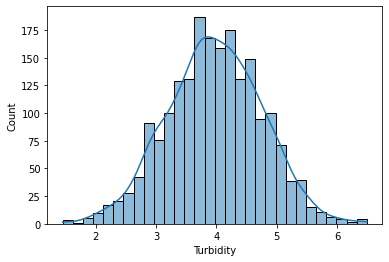

In [37]:
sns.histplot(df["Turbidity"], kde=True)

In [38]:
stat, p = stats.normaltest(df["Turbidity"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=0.524, p=0.769
Berdistribusi Normal


### Soal 4
Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

In [39]:
def zScore1(X,u0,simpbaku,n):
    return (X-u0)/(simpbaku/n**(1/2))
def zScore2(p,p0,q0,n):
    return (p-p0)/(p0*q0/n)**(1/2)

#### a. Nilai Rata-rata pH di atas 7?

a. Nilai rata-rata pH di atas 7
1. H0 : μ=7
2. H1 : μ>7
3. α = 0.05
4. Uji Statistik : z=(x̄-μ0)/(σ/sqrt(n))
   Daerah Kritis : z>zα : z >1.645
5. Komputasi
   x̄ : 7.0871927687138285 
   n: 2010 
   σ: 1.5728029470456655 
   μ0 : 7
   p_value : 0.006477571731867804 
   z: 2.485
6. Test Daerah Kritis
   Tolak H0 karena nilai uji = 2.485>1.645 (z>zα)
   Rata-Rata pH>7


<AxesSubplot:>

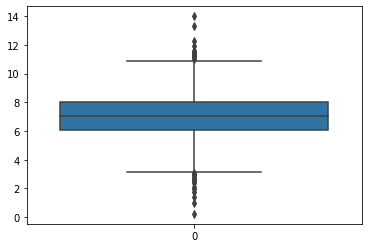

In [40]:
print("a. Nilai rata-rata pH di atas 7")

#1
H0 = "μ=7"
print("1. H0 : {}".format(H0))

#2
H1 = "μ>7"
print("2. H1 : {}".format(H1))

#3
α = 5e-2
print("3. α = {}".format(α))

#4
zα = round(stats.norm.ppf(1-α),3)
print("4. Uji Statistik : z=(x̄-μ0)/(σ/sqrt(n))")
print("   Daerah Kritis : z>zα : z >{}".format(zα))

#5
X = df["pH"].mean()
u0= 7
simpbaku = df["pH"].std()
n = len( df["pH"])
z = round(zScore1(X,u0,simpbaku,n),3)
p_value = 1-stats.norm.cdf(z)
print("5. Komputasi")
print("   x̄ : {} \n   n: {} \n   σ: {} \n   μ0 : {}".format(X,n,simpbaku,u0))
print("   p_value : {} \n   z: {}".format(str(p_value),str(z)))

#6
print("6. Test Daerah Kritis")
if (z > zα):
    print("   Tolak H0 karena nilai uji = {}>{} (z>zα)".format(str(z),str(zα)))
    print("   Rata-Rata pH>7")
else :
    print("   Terima H0 karena nilai uji = {}<={} (z<=zα)".format(str(z),str(zα)))
    print("   Rata-Rata pH=7")
    
sns.boxplot(data = df["pH"])

#### b. Nilai Rata-rata Hardness tidak sama dengan 205?

b. Nilai Rata-rata Hardness tidak sama dengan 205?
1. H0 : μ=205
2. H1 : μ≠205
3. α = 0.05
4. Uji Statistik : z=(x̄-μ0)/(σ/sqrt(n))
   Daerah Kritis : z>zα/2 atau z <-zα/2 : z>1.96 atau z<-1.96
5. Komputasi
   x̄ : 195.96920903783524 
   n: 2010 
   σ: 32.643165859429864 
   μ0 : 205
   p_value : 0.0 
   z: -12.403
6. Test Daerah Kritis
   Tolak H0 karena nilai uji = -12.403<-1.96 (z<-zα/2)
   Rata-rata hardness≠205


<AxesSubplot:>

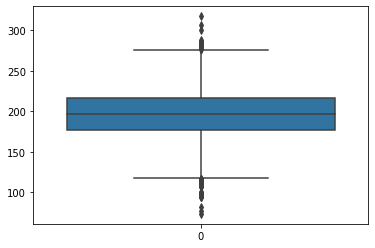

In [41]:
print("b. Nilai Rata-rata Hardness tidak sama dengan 205?")

#1
H0 = "μ=205"
print("1. H0 : {}".format(H0))

#2
H1 = "μ≠205"
print("2. H1 : {}".format(H1))

#3
α = 5e-2
print("3. α = {}".format(α))

#4
zα2 = round(stats.norm.ppf(1-(α/2)),3)
print("4. Uji Statistik : z=(x̄-μ0)/(σ/sqrt(n))")
print("   Daerah Kritis : z>zα/2 atau z <-zα/2 : z>{} atau z<{}".format(zα2,-1*zα2))

#5
X = df["Hardness"].mean()
u0= 205
simpbaku = df["Hardness"].std()
n = len( df["Hardness"])
z = round(zScore1(X,u0,simpbaku,n),3)
p_value = 1-abs(stats.norm.cdf(z)-stats.norm.cdf(-1*z))
print("5. Komputasi")
print("   x̄ : {} \n   n: {} \n   σ: {} \n   μ0 : {}".format(X,n,simpbaku,u0))
print("   p_value : {} \n   z: {}".format(str(p_value),str(z)))

#6
print("6. Test Daerah Kritis")
if (z > zα2 or z<-1*zα2):
    if (z > zα2):
        print("   Tolak H0 karena nilai uji = {}>{} (z>zα/2)".format(z,zα2))
    else:
        print("   Tolak H0 karena nilai uji = {}<{} (z<-zα/2)".format(z,-1*zα2))
    print("   Rata-rata hardness≠205")
else :
    print("   Terima H0 karena nilai uji = {}<{}<{} (-zα/2<z<zα/2)".format(-1*zα2,z,zα2))
    print("   Rata-rata hardness = 205")
    
sns.boxplot(data = df["Hardness"])

#### c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?
1. H0 : μ=21900
2. H1 : μ≠21900
3. α = 0.05
4. Uji Statistik : z=(x̄-μ0)/(σ/sqrt(n))
   Daerah Kritis : z>zα/2 atau z <-zα/2 : z>1.96 atau z<-1.96
5. Komputasi
   x̄ : 22347.334446383426 
   n: 2010 
   σ: 8625.397911190576 
   μ0 : 21900
   p_value : 0.020071960200548133 
   z: 2.325
6. Test Daerah Kritis
   Tolak H0 karena nilai uji = 2.325>1.96 (z>zα/2)
   Nilai Rata-rata 100 baris pertama kolom Solids ≠ 21900


<AxesSubplot:>

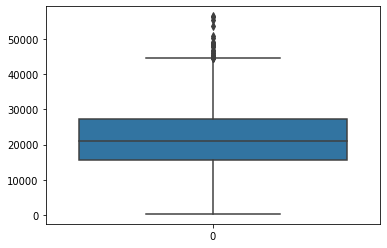

In [42]:
print("c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?")

#1
H0 = "μ=21900"
print("1. H0 : {}".format(H0))

#2
H1 = "μ≠21900"
print("2. H1 : {}".format(H1))

#3
α = 5e-2
print("3. α = {}".format(α))

#4
zα2 = round(stats.norm.ppf(1-(α/2)),3)
print("4. Uji Statistik : z=(x̄-μ0)/(σ/sqrt(n))")
print("   Daerah Kritis : z>zα/2 atau z <-zα/2 : z>{} atau z<{}".format(zα2,-1*zα2))

#5
data = df["Solids"][:100]
X = data.mean()
u0= 21900
simpbaku =  df["Solids"].std()
n = len(  df["Solids"])
z = round(zScore1(X,u0,simpbaku,n),3)
p_value =  1-abs(stats.norm.cdf(z)-stats.norm.cdf(-1*z))
print("5. Komputasi")
print("   x̄ : {} \n   n: {} \n   σ: {} \n   μ0 : {}".format(X,n,simpbaku,u0))
print("   p_value : {} \n   z: {}".format(str(p_value),str(z)))

#6
print("6. Test Daerah Kritis")
if (z > zα2 or z<-1*zα2):
    if (z > zα2):
        print("   Tolak H0 karena nilai uji = {}>{} (z>zα/2)".format(z,zα2))
    else:
        print("   Tolak H0 karena nilai uji = {}<{} (z<-zα/2)".format(z,-1*zα2))
    print("   Nilai Rata-rata 100 baris pertama kolom Solids ≠ 21900")
else :
    print("   Terima H0 karena nilai uji = {}<{}<{} (-zα/2<z<zα/2)".format(-1*zα2,z,zα2))
    print("   Nilai Rata-rata 100 baris pertama kolom Solids = 21900")
    
sns.boxplot(data = df["Solids"])

#### d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%
1. H0 : p = 0,10
2. H1 : p≠0,10
3. α = 0.05
4. Uji Statistik : z=(p̂-p0)/sqrt(p0*q0/n), σ diketahui
   Daerah Kritis : z>zα/2 atau z <-zα/2 : z>1.96 atau z<-1.96
5. Komputasi
   p̂ : 0.3706467661691542 
   n: 2010 
   p0: 0.1 
   q0 : 0.9
   p_value : 0.0 
   z: 40.446
6. Test Daerah Kritis
   Tolak H0 karena nilai uji = 40.446>1.96 (z>zα/2)
   Proporsi nilai Conductivity yang lebih dari 450 ≠ 10%


<AxesSubplot:>

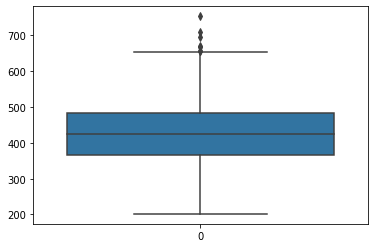

In [43]:
print("d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%")

#1
H0 = "p = 0,10"
print("1. H0 : {}".format(H0))

#2
H1 = "p≠0,10"
print("2. H1 : {}".format(H1))

#3
α = 5e-2
print("3. α = {}".format(α))

#4
zα2 = round(stats.norm.ppf(1-(α/2)),3)
print("4. Uji Statistik : z=(p̂-p0)/sqrt(p0*q0/n), σ diketahui")
print("   Daerah Kritis : z>zα/2 atau z <-zα/2 : z>{} atau z<{}".format(zα2,-1*zα2))

#5
data = [item for item in df["Conductivity"] if item >450]
p = len(data)/len(df["Conductivity"])
p0 = 0.1
q0= 1-p0
n = len(  df["Conductivity"])
z = round(zScore2(p,p0,q0,n),3)
p_value =  1-abs(stats.norm.cdf(z)-stats.norm.cdf(-1*z))
print("5. Komputasi")
print("   p̂ : {} \n   n: {} \n   p0: {} \n   q0 : {}".format(p,n,p0,q0))
print("   p_value : {} \n   z: {}".format(str(p_value),str(z)))

#6
print("6. Test Daerah Kritis")
if (z > zα2 or z<-1*zα2):
    if (z > zα2):
        print("   Tolak H0 karena nilai uji = {}>{} (z>zα/2)".format(z,zα2))
    else:
        print("   Tolak H0 karena nilai uji = {}<{} (z<-zα/2)".format(z,-1*zα2))
    print("   Proporsi nilai Conductivity yang lebih dari 450 ≠ 10%")
else :
    print("   Terima H0 karena nilai uji = {}<{}<{} (-zα/2<z<zα/2)".format(-1*zα2,z,zα2))
    print("   Proporsi nilai Conductivity yang lebih dari 450 = 10%")
    
sns.boxplot(data = df["Conductivity"])

#### e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

e.Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?
1. H0 : p = 0,05
2. H1 : p<0,05
3. α = 0.05
4. Uji Statistik : z=(p̂-p0)/sqrt(p0*q0/n), σ diketahui
   Daerah Kritis : z <-zα : z<-1.645
5. Komputasi
   p̂ : 0.0527363184079602 
   n: 2010 
   p0: 0.05 
   q0 : 0.95
   p_value : 0.7132825580297869 
   z: 0.563
6. Test Daerah Kritis
   Terima H0 karena nilai uji = 0.563>=1.645 (z>=zα)
   Proporsi nilai Trihalomethanes yang kurang dari 40, adalah sama dengan 5%


<AxesSubplot:>

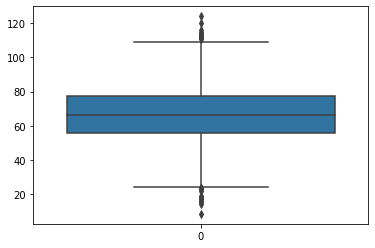

In [44]:
print("e.Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?")

#1
H0 = "p = 0,05"
print("1. H0 : {}".format(H0))

#2
H1 = "p<0,05"
print("2. H1 : {}".format(H1))

#3
α = 5e-2
print("3. α = {}".format(α))

#4
zα = round(stats.norm.ppf(1-α),3)
print("4. Uji Statistik : z=(p̂-p0)/sqrt(p0*q0/n), σ diketahui")
print("   Daerah Kritis : z <-zα : z<{}".format(-1*zα))

#5
data = [item for item in df["Trihalomethanes"] if item <40]
p = len(data)/len(df["Trihalomethanes"])
p0 = 0.05
q0= 1-p0
n = len(  df["Trihalomethanes"])
z = round(zScore2(p,p0,q0,n),3)
p_value = stats.norm.cdf(z)
print("5. Komputasi")
print("   p̂ : {} \n   n: {} \n   p0: {} \n   q0 : {}".format(p,n,p0,q0))
print("   p_value : {} \n   z: {}".format(str(p_value),str(z)))

#6
print("6. Test Daerah Kritis")
if (z < -1*zα):
    print("   Tolak H0 karena nilai uji = {}<{} (z<-zα)".format(str(z),str(-1*zα)))
    print("   Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%")
else :
    print("   Terima H0 karena nilai uji = {}>={} (z>=zα)".format(str(z),str(zα)))
    print("   Proporsi nilai Trihalomethanes yang kurang dari 40, adalah sama dengan 5%")
    
sns.boxplot(data = df["Trihalomethanes"])

### Soal 5
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

In [45]:
def zScore(d0, x1, x2, v1, v2, n1, n2):
  return((x1 - x2) - d0)/(((v1/n1) + (v2/n2))**0.5)

#### a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Rata-rata Bagian Awal Kolom Sulfate

In [46]:
df['Sulfate'].iloc[:len(df)//2].mean()

331.30532950549565

<AxesSubplot:>

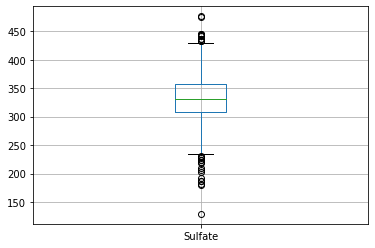

In [47]:
df.iloc[:len(df)//2].boxplot(['Sulfate'])

Rata-rata Bagian Akhir Kolom Sulfate

In [48]:
df['Sulfate'].iloc[len(df)//2:].mean()

335.11742332488245

<AxesSubplot:>

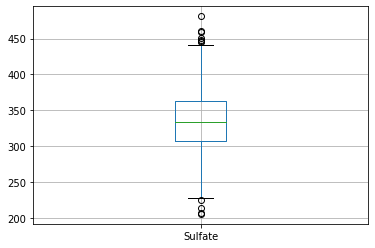

In [49]:
df.iloc[len(df)//2:].boxplot(['Sulfate'])

##### Enam Langkah Testing SulfateAwal dan SulfateAkhir

1. Hipotesis Nol  
   ${H_0: \mu_{SulfateAwal} = \mu_{SulfateAkhir}}$
2. Hipotesis Alternatif  
   ${H_1: \mu_{SulfateAwal} \ne \mu_{SulfateAkhir}}$
3. Tingkat Signifikan  
   ${\alpha = 0.05}$

4. Penentuan uji statistik dan daerah kritis  

In [50]:
zalpha = stats.norm.ppf(1 - 0.05/2)
round(zalpha, 3)

1.96


5. Perhitungan uji statistik dan p-value  

In [51]:
bagianAwal = df['Sulfate'].iloc[:len(df)//2]
bagianAkhir = df['Sulfate'].iloc[len(df)//2:]

meanAwal = bagianAwal.mean()
meanAkhir = bagianAkhir.mean()

varAwal = bagianAwal.var()
varAkhir = bagianAkhir.var()

z = zScore(0, meanAwal, meanAkhir, varAwal, varAkhir, len(bagianAwal), len(bagianAkhir))
p = 2 * (1 - stats.norm.cdf(abs(z)))

print("z:", z)
print("p-value:", p)

z: -2.0752690696871983
p-value: 0.03796160438512852


6. Keputusan

In [52]:
if z < -zalpha or z > zalpha:
  print("Hipotesis Null ditolak")
else:
  print("Hipotesis Null diterima")

Hipotesis Null ditolak


#### b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

Rata-rata Bagian Awal Kolom OrganicCarbon

In [53]:
df['OrganicCarbon'].iloc[:len(df)//2].mean()

14.253972723723393

<AxesSubplot:>

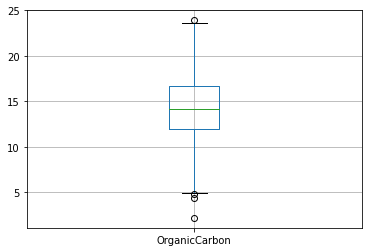

In [54]:
df.iloc[:len(df)//2].boxplot(['OrganicCarbon'])

Rata-rata Bagian Akhir Kolom OrganicCarbon

In [55]:
df['OrganicCarbon'].iloc[len(df)//2:].mean()

14.461907080372756

<AxesSubplot:>

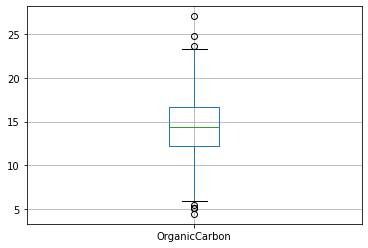

In [56]:
df.iloc[len(df)//2:].boxplot(['OrganicCarbon'])

##### Enam Langkah Testing OrganicCarbonAwal dan OrganicCarbonAkhir

1. Hipotesis Nol  
   ${H_0: \mu_{OrganicCarbonAwal} = \mu_{OrganicCarbonAkhir} + 0.15}$
2. Hipotesis Alternatif  
   ${H_1: \mu_{OrganicCarbonAwal} \ne \mu_{OrganicCarbonAkhir} + 0.15}$
3. Tingkat Signifikan  
   ${\alpha = 0.05}$

4. Penentuan uji statistik dan daerah kritis  

In [57]:
zalpha = stats.norm.ppf(1 - 0.05/2)
round(zalpha, 3)

1.96

5. Perhitungan uji statistik dan p-value  

In [58]:
bagianAwal = df['OrganicCarbon'].iloc[:len(df)//2]
bagianAkhir = df['OrganicCarbon'].iloc[len(df)//2:]

meanAwal = bagianAwal.mean()
meanAkhir = bagianAkhir.mean()

varAwal = bagianAwal.var()
varAkhir = bagianAkhir.var()

z = zScore(0.15, meanAwal, meanAkhir, varAwal, varAkhir, len(bagianAwal), len(bagianAkhir))
p = 2 * (1 - stats.norm.cdf(abs(z)))

print("z:", z)
print("p-value:", p)

z: -2.413145517798807
p-value: 0.015815503817599996


6. Keputusan

In [59]:
if z < -zalpha or z > zalpha:
  print("Hipotesis Null ditolak")
else:
  print("Hipotesis Null diterima")

Hipotesis Null ditolak


#### c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

Rata-rata 100 Baris Pertama Kolom Chloramines

In [60]:
df['Chloramines'].iloc[:100].mean()

7.007771140423921

<AxesSubplot:>

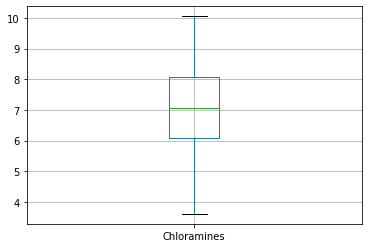

In [61]:
df.iloc[:100].boxplot(['Chloramines'])

Rata-rata 100 Baris Terakhir Kolom Chloramines

In [62]:
df['Chloramines'].iloc[-100:].mean()

7.147197636249925

<AxesSubplot:>

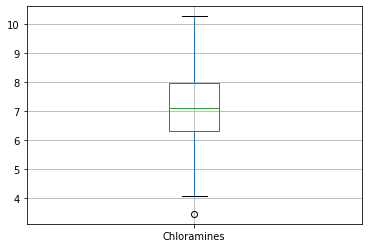

In [63]:
df.iloc[-100:].boxplot(['Chloramines'])

##### Enam Langkah Testing ChloraminesAwal dan ChloraminesAkhir:

1. Hipotesis Nol  
   ${H_0: \mu_{ChloraminesAwal} = \mu_{ChloraminesAkhir}}$
2. Hipotesis Alternatif  
   ${H_1: \mu_{ChloraminesAwal} \ne \mu_{ChloraminesAkhir}}$
3. Tingkat Signifikan  
   ${\alpha = 0.05}$

4. Penentuan uji statistik dan daerah kritis

In [64]:
zalpha = stats.norm.ppf(1 - 0.05/2)
round(zalpha, 3)

1.96

5. Perhitungan uji statistik dan p-value

In [65]:
bagianAwal = df['Chloramines'].iloc[:100]
bagianAkhir = df['Chloramines'].iloc[-100:]

meanAwal = bagianAwal.mean()
meanAkhir = bagianAkhir.mean()

varAwal = bagianAwal.var()
varAkhir = bagianAkhir.var()

z = zScore(0, meanAwal, meanAkhir, varAwal, varAkhir, len(bagianAwal), len(bagianAkhir))
p = 2 * (1 - stats.norm.cdf(abs(z)))

print("z:", z)
print("p-value:", p)

z: -0.7059424842236872
p-value: 0.48022390604502796


6. Keputusan

In [66]:
if z < -zalpha or z > zalpha:
  print("Hipotesis Null ditolak")
else:
  print("Hipotesis Null diterima")

Hipotesis Null diterima


#### d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?

Bagian Awal Kolom Turbidity

In [67]:
df['Turbidity'].iloc[:len(df)//2].describe()

count    1005.000000
mean        3.942879
std         0.786455
min         1.496101
25%         3.403393
50%         3.964450
75%         4.496627
max         6.494249
Name: Turbidity, dtype: float64

<AxesSubplot:>

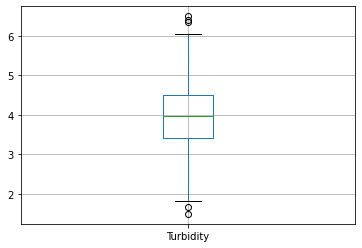

In [68]:
df.iloc[:len(df)//2].boxplot(['Turbidity'])

Bagian Akhir Kolom Turbidity

In [69]:
df['Turbidity'].iloc[len(df)//2:].describe()

count    1005.000000
mean        3.996115
std         0.773917
min         1.450000
25%         3.488675
50%         3.969740
75%         4.549917
max         6.494749
Name: Turbidity, dtype: float64

<AxesSubplot:>

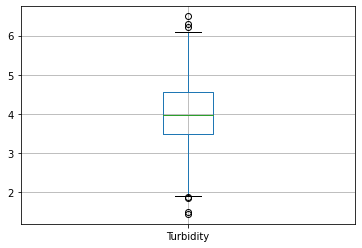

In [70]:
df.iloc[len(df)//2:].boxplot(['Turbidity'])

Enam Langkah Testing TurbidityAwal dan TurbidityAkhir:  

X adalah variabel random TurbidityAwal  
Y adalah variabel random TurbidityAkhir

1. Hipotesis Nol  
   ${H_0: P(X > 4) = P(Y > 4)}$
2. Hipotesis Alternatif  
   ${H_1: P(X > 4) > P(Y > 4)}$
3. Tingkat Signifikan  
   ${\alpha = 0.05}$

4. Penentuan uji statistik dan daerah kritis

In [71]:
zalpha = stats.norm.ppf(1 - 0.05)
round(zalpha, 3)

1.645

5. Perhitungan uji statistik dan p-value

In [72]:
bagianAwal = df['Turbidity'].iloc[:len(df)//2]
bagianAkhir = df['Turbidity'].iloc[len(df)//2:]

bagianAwal2 = bagianAwal.loc[bagianAwal > 4]
bagianAkhir2 = bagianAkhir.loc[bagianAkhir > 4]

p1 = len(bagianAwal2) / len(bagianAwal)
p2 = len(bagianAkhir2) / len(bagianAkhir)

x = (len(bagianAwal2) + len(bagianAkhir2))/(len(bagianAwal) + len(bagianAkhir))
y = 1 - x

z = (p1 - p2) / ((x * y / len(bagianAwal)) + (x * y / len(bagianAkhir))**0.5)
p = 1 - stats.norm.cdf(z)

print("z:", z)
print("p-value:", p)

z: -0.18640972388732355
p-value: 0.5739382662410686


6. Keputusan

In [73]:
if z > zalpha:
  print("Hipotesis Null ditolak")
else:
  print("Hipotesis Null diterima")

Hipotesis Null diterima


#### e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

Variansi Bagian Awal Kolom Sulfate

In [74]:
df['Sulfate'].iloc[:len(df)//2].var()

1708.3966020772502

<AxesSubplot:>

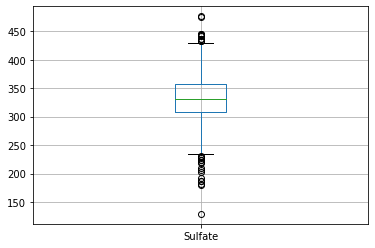

In [75]:
df.iloc[:len(df)//2].boxplot(['Sulfate'])

Variansi Bagian Akhir Kolom Sulfate

In [76]:
df['Sulfate'].iloc[len(df)//2:].var()

1682.7330644425087

<AxesSubplot:>

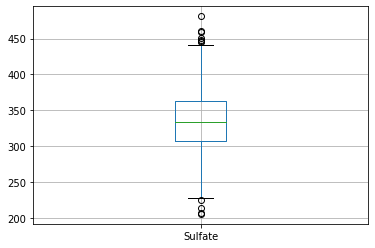

In [77]:
df.iloc[len(df)//2:].boxplot(['Sulfate'])

##### Enam Langkah Testing SulfateAwal dan SulfateAkhir:

1. Hipotesis Nol  
   ${H_0: \sigma^2_{SulfateAwal} = \sigma^2_{SulfateAkhir}}$
2. Hipotesis Alternatif  
   ${H_1: \sigma^2_{SulfateAwal} \ne \sigma^2_{SulfateAkhir}}$
3. Tingkat Signifikan  
   ${\alpha = 0.05}$

4. Penentuan uji statistik dan daerah kritis  

In [90]:
f1 = stats.f.ppf(q=1 - 0.05/2, dfn=len(bagianAwal) - 1, dfd=len(bagianAkhir) - 1)
f2 = 1 / (stats.f.ppf(q=1 - 0.05/2, dfn=len(bagianAkhir) - 1, dfd=len(bagianAwal) - 1))
print("f1:", round(f1, 3))
print("f2:", round(f2, 3))

f1: 1.132
f2: 0.884


5. Perhitungan uji statistik dan p-value  

In [78]:
bagianAwal = df['Sulfate'].iloc[:len(df)//2]
bagianAkhir = df['Sulfate'].iloc[len(df)//2:]

varAwal = bagianAwal.var()
varAkhir = bagianAkhir.var()

if varAwal > varAkhir:
  f = varAwal / varAkhir
else:
  f = varAkhir / varAwal

p = 2 * (1 - stats.f.cdf(f, len(bagianAkhir) - 1, len(bagianAwal) - 1))

print("f:", f)
print("p-value:", p)

f: 1.0152511043950063
p-value: 0.8105332960349165


6. Keputusan

In [79]:
if f > f1 or f < f2:
  print("Hipotesis Null ditolak")
else:
  print("Hipotesis Null diterima")

Hipotesis Null diterima


### Soal 6
Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

#### a. Korelasi pH dengan Potability

Nilai korelasi: 0.02
Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa pH dan Potability merupakan korelasi positif


<AxesSubplot:xlabel='pH', ylabel='Potability'>

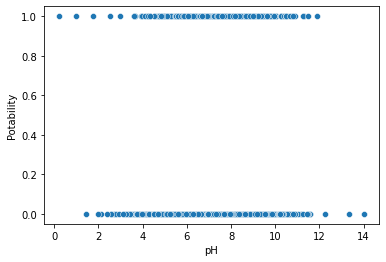

In [80]:
korelasi = round(df["pH"].corr(df["Potability"]),2)
print("Nilai korelasi:",korelasi)
if(korelasi > 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa pH dan Potability merupakan korelasi positif")
elif(korelasi < 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa pH dan Potability merupakan korelasi negatif")
else:
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa pH dan Potability tidak berkorelasi")
 
sns.scatterplot(data = df, x = "pH", y = "Potability")

#### b. Korelasi Hardness dengan Potability

Nilai korelasi: -0.0
Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Hardness dan Potability tidak berkorelasi


<AxesSubplot:xlabel='Hardness', ylabel='Potability'>

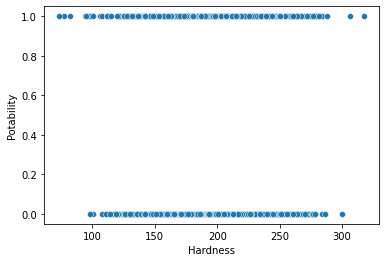

In [81]:
korelasi = round(df["Hardness"].corr(df["Potability"]),2)
print("Nilai korelasi:",korelasi)
if(korelasi > 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Hardness dan Potability merupakan korelasi positif")
elif(korelasi < 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Hardness dan Potability merupakan korelasi negatif")
else:
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Hardness dan Potability tidak berkorelasi")
    
sns.scatterplot(data = df, x = "Hardness", y = "Potability")

#### c. Korelasi Solids dengan Potability

Nilai korelasi: 0.03897657818173466
Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Solids dan Potability merupakan korelasi positif


<AxesSubplot:xlabel='Solids', ylabel='Potability'>

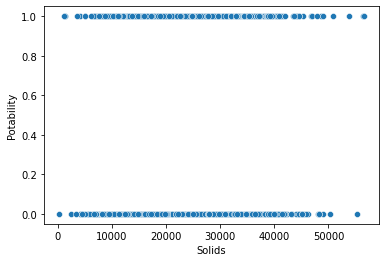

In [82]:
korelasi = df["Solids"].corr(df["Potability"])
print("Nilai korelasi:",korelasi)
if(korelasi > 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Solids dan Potability merupakan korelasi positif")
elif(korelasi < 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Solids dan Potability merupakan korelasi negatif")
else:
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Solids dan Potability tidak berkorelasi")
    
sns.scatterplot(data = df, x = "Solids", y = "Potability")

#### d. Korelasi Chloramines dengan Potability

Nilai korelasi: 0.02077892184052409
Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Chloramines dan Potability merupakan korelasi positif


<AxesSubplot:xlabel='Chloramines', ylabel='Potability'>

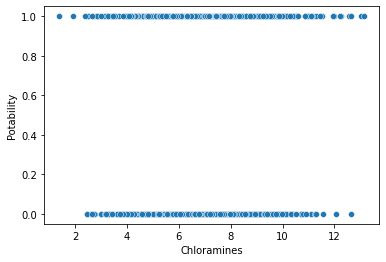

In [83]:
korelasi = df["Chloramines"].corr(df["Potability"])
print("Nilai korelasi:",korelasi)
if(korelasi > 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Chloramines dan Potability merupakan korelasi positif")
elif(korelasi < 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Chloramines dan Potability merupakan korelasi negatif")
else:
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Chloramines dan Potability tidak berkorelasi")
    
sns.scatterplot(data = df, x = "Chloramines", y = "Potability")

#### e. Korelasi Sulfate dengan Potability

Nilai korelasi: -0.015703164419273778
Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Sulfate dan Potability merupakan korelasi negatif


<AxesSubplot:xlabel='Sulfate', ylabel='Potability'>

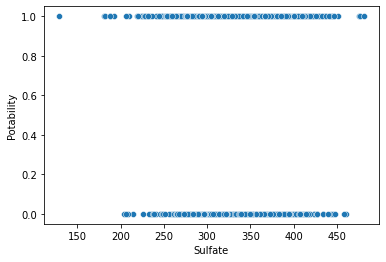

In [84]:
korelasi = df["Sulfate"].corr(df["Potability"])
print("Nilai korelasi:",korelasi)
if(korelasi > 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Sulfate dan Potability merupakan korelasi positif")
elif(korelasi < 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Sulfate dan Potability merupakan korelasi negatif")
else:
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Sulfate dan Potability tidak berkorelasi")
    
sns.scatterplot(data = df, x = "Sulfate", y = "Potability")

#### f. Korelasi Conductivity dengan Potability

Nilai korelasi: -0.02
Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Conductivity dan Potability merupakan korelasi negatif


<AxesSubplot:xlabel='Conductivity', ylabel='Potability'>

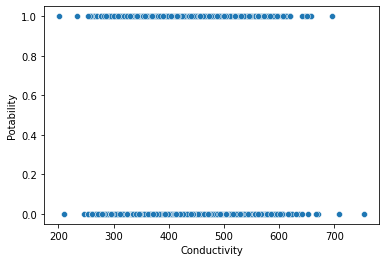

In [85]:
korelasi = round(df["Conductivity"].corr(df["Potability"]),2)
print("Nilai korelasi:",korelasi)
if(korelasi > 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Conductivity dan Potability merupakan korelasi positif")
elif(korelasi < 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Conductivity dan Potability merupakan korelasi negatif")
else:
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Conductivity dan Potability tidak berkorelasi")
    
sns.scatterplot(data = df, x = "Conductivity", y = "Potability")

#### g. Korelasi OrganicCarbon dengan Potability

Nilai korelasi: -0.02
Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa OrganicCarbon dan Potability merupakan korelasi negatif


<AxesSubplot:xlabel='Solids', ylabel='Potability'>

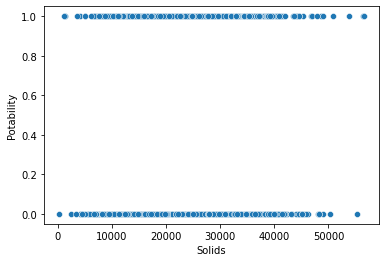

In [86]:
korelasi = round(df["OrganicCarbon"].corr(df["Potability"]),2)
print("Nilai korelasi:",korelasi)
if(korelasi > 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa OrganicCarbon dan Potability merupakan korelasi positif")
elif(korelasi < 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa OrganicCarbon dan Potability merupakan korelasi negatif")
else:
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa OrganicCarbon dan Potability tidak berkorelasi")
    
sns.scatterplot(data = df, x = "Solids", y = "Potability")

#### h. Korelasi Trihalomethanes dengan Potability

Nilai korelasi: 0.01
Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Trihalomethanes dan Potability merupakan korelasi positif


<AxesSubplot:xlabel='Trihalomethanes', ylabel='Potability'>

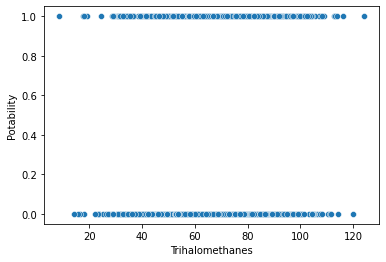

In [87]:
korelasi = round(df["Trihalomethanes"].corr(df["Potability"]),2)
print("Nilai korelasi:",korelasi)
if(korelasi > 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Trihalomethanes dan Potability merupakan korelasi positif")
elif(korelasi < 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Trihalomethanes dan Potability merupakan korelasi negatif")
else:
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Trihalomethanes dan Potability tidak berkorelasi")
    
sns.scatterplot(data = df, x = "Trihalomethanes", y = "Potability")

#### i. Korelasi Turbidity dengan Potability

Nilai korelasi: 0.02
Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Turbidity dan Potability merupakan korelasi positif


<AxesSubplot:xlabel='Turbidity', ylabel='Potability'>

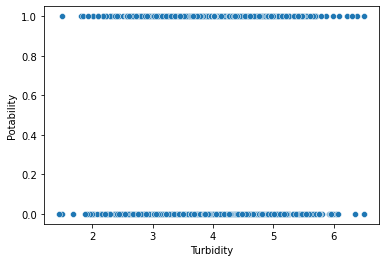

In [88]:
korelasi = round(df["Turbidity"].corr(df["Potability"]),2)
print("Nilai korelasi:",korelasi)
if(korelasi > 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Turbidity dan Potability merupakan korelasi positif")
elif(korelasi < 0):
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Turbidity dan Potability merupakan korelasi negatif")
else:
    print("Berdasarkan nilai korelasi yang didapatkan dapat disimpulkan bahwa Turbidity dan Potability tidak berkorelasi")
    
sns.scatterplot(data = df, x = "Turbidity", y = "Potability")